In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [7]:
# 分布の確認
import seaborn as sns

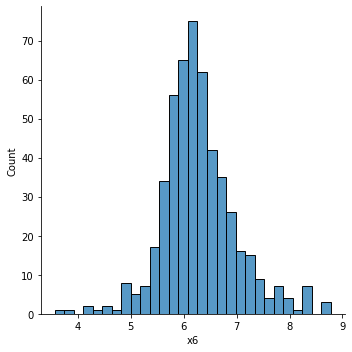

In [10]:
sns.displot(df['x6']) #例

# 外れ値の除去(3σ法)

In [16]:
col = 'x6'

In [17]:
mean = df.mean()

In [18]:
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [19]:
# プログラム自体を変えるのではなく、変数を変えるようにしておくと汎用性が高い
mean[col]

6.284634387351779

In [21]:
# 標準偏差(standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [26]:
sigma[col]

0.7026171434153233

In [27]:
low = mean[col]-3*sigma[col]
low

4.176782957105809

In [29]:
high = mean[col]+3*sigma[col]
high

8.392485817597748

In [35]:
df2 = df[(df[col]>low)&(df[col]<high)]#外れ値を除去
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [36]:
len(df)

506

In [37]:
len(df2)

498

/Users/masa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

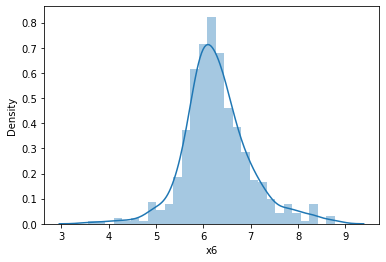

In [46]:
# 分布の確認(オリジナルデータ)
sns.distplot(df['x6'])

/Users/masa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

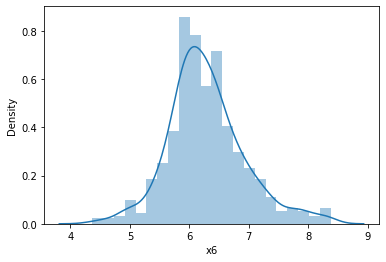

In [47]:
# 分布の確認(外れ値除去後)
sns.distplot(df2['x6'])

In [49]:
# 正規分布を仮定していることに注意

# 外れ値除去(全変数に適用)

In [51]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [63]:
_df = df
for col in cols:
    #3σ法の上下限値を設定
    low = mean[col] - 3*sigma[col]
    high = mean[col] + 3*sigma[col]
    #条件での絞り込み
    _df = _df[(_df[col]>low)&(_df[col]<high)]

In [64]:
#オリジナル
len(df)

506

In [65]:
#3σ法適用後
#1.実際は正規分布にしたがっていなかったことで20%ほど減った
#2.更に変数が今回14個あるため、0.03×14だけ少なくなっている
len(_df)

415

# サンプルが減ることを防ぐ方法
- 外れ値を取り除く(今回)
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析等を用いて、潜在変数に変換した後に3σ法を適用する(高度)

# 入力変数と出力変数に分割

In [67]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [69]:
# df.iloc[行,列]
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

# 八百長にならぬよう訓練データと検証データに分割する

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [72]:
from sklearn.linear_model import LinearRegression

In [74]:
#モデルを宣言
model = LinearRegression()

In [75]:
#モデルの学習
model.fit(X_train,y_train)

LinearRegression()

In [77]:
#検証(訓練データ)
model.score(X_train,y_train)
#外れ値を除去したため、より高い数値となる

0.7972109224535133

In [79]:
#検証(検証データ)
model.score(X_test,y_test)
#訓練データでは数値が上がるが検証データでは数値が下がってしまう(過学習/オーバーフィッティング)

0.6253776004329594

In [80]:
#重回帰分析はオーバーフィッティングが避けられず、データのクレンジングを頑張るしかない
#他の機械学習の手法では、ハイパーパラメータと呼ばれる人間側で調整するパラメータを持っていたりし、これにより防ぐことができる

# スケーリング

In [95]:
import sklearn

In [96]:
from sklearn.preprocessing import StandardScaler
#前処理もできる

In [97]:
#scalerの宣言
scaler = StandardScaler()

In [98]:
#scalerの学習(平均と標準偏差を計算)
scaler.fit(X_train)
#訓練データのみを使うことに注意
#テストデータは検証の時にしか使わないというルール

StandardScaler()

In [103]:
#scaling
X_train2 = scaler.transform(X_train)
X_train2
#-3~3の間に99.7%が含まれている

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [104]:
X_test2 = scaler.transform(X_test)

In [106]:
#モデルの宣言
model = LinearRegression()

In [110]:
#モデルの学習
model.fit(X_train2,y_train)
#yに関しては、変数が一つなので今回スケーリングは行わない

LinearRegression()

In [111]:
#検証(訓練データ)
model.score(X_train2,y_train)

0.7972109224535133

In [112]:
#検証(検証データ)
model.score(X_test2,y_test)

0.6253776004329598

In [113]:
#今回の目的はスケーリングすることで精度を上げることでなく、スケールの揃った重みを見てどこが重要なのかを見ることにある

In [116]:
#重みの確認
model.coef_
#3.92(x6)や-2.76(x13)が効いていそう

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

In [115]:
np.set_printoptions(precision=2,suppress=True)

/Users/masa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

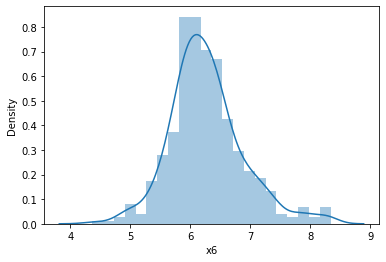

In [119]:
sns.distplot(_df['x6'])
#正規分布に近いものであることが分かる

/Users/masa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x13', ylabel='Density'>

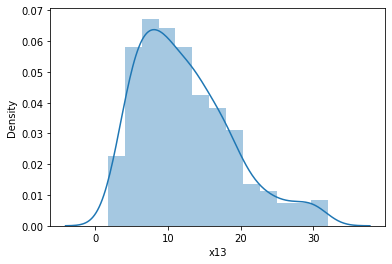

In [123]:
sns.distplot(_df['x13'])
#正規分布に近いものであることがわかる

In [124]:
#重みを、どの変数が重要であるかを説明する指標として使うことができる!